In [2]:
# Bunch of Libraries, only a few will be used

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import urllib
import urllib.request
import requests
from random import randint
from time import sleep
from bs4 import BeautifulSoup 
from bs4 import Comment
import os

In [3]:
# Cleaning data

df = pd.read_csv('AI_Company_Reg.csv')

df.rename(columns={"EA Employee":"EA_Employee"}, inplace=True)
df.rename(columns={"EA ratio":"EA_per_increase"}, inplace=True)
df.rename(columns={"Nintendo Employee":"Nintendo_Employee"}, inplace=True)
df.rename(columns={"Nintendo Ratio":"Nin_per_increase"}, inplace=True)
df.rename(columns={"Percent of Businesses using AI":"business_AI_use"}, inplace=True)
df.rename(columns={"AI Ratio":"AI_per_increase"}, inplace=True)

df['EA_Employee'] = df['EA_Employee'].str.replace(',','').astype(float)
df['Nintendo_Employee'] = df['Nintendo_Employee'].str.replace(',','').astype(float)

df.at[9,'business_AI_use'] = np.nan

df['Total_Employed'] = df['EA_Employee'] + df['Nintendo_Employee']
df['Total_Employed_increase'] = (df['EA_per_increase'] + df['Nin_per_increase']) / 2

# Split DF into pre and post treatmentt (before and after ai usage)
df_post = df.iloc[:9]
df_pre = df.iloc[9:]

df

,Year,EA_Employee,EA_per_increase,Nintendo_Employee,Nin_per_increase,business_AI_use,AI_per_increase,Total_Employed,Total_Employed_increase
0,2025,14500.0,5.84,8205.0,6.23,88,22.22,22705.0,6.035
1,2024,13700.0,2.24,7724.0,5.56,72,30.91,21424.0,3.900
2,2023,13400.0,3.88,7317.0,8.93,55,10.00,20717.0,6.405
3,2022,12900.0,17.27,6717.0,2.18,50,-10.71,19617.0,9.725
4,2021,11000.0,12.24,6574.0,6.03,56,12.00,17574.0,9.135
5,2020,9800.0,1.03,6200.0,4.31,50,-13.79,16000.0,2.670
6,2019,9700.0,4.30,5944.0,8.05,58,23.40,15644.0,6.175
7,2018,9300.0,5.68,5501.0,6.48,47,135.00,14801.0,6.080
8,2017,8800.0,3.53,5166.0,2.01,20,NaN,13966.0,2.770
9,2016,8500.0,1.19,5064.0,-1.09,NaN,NaN,13564.0,0.050


In [4]:
corr = df[['Year', 'EA_Employee', 'EA_per_increase', 'Nintendo_Employee', 'Nin_per_increase', 'business_AI_use', 'AI_per_increase']].corr()
corr

,Year,EA_Employee,EA_per_increase,Nintendo_Employee,Nin_per_increase,business_AI_use,AI_per_increase
Year,1.000000,0.894709,0.125057,0.945898,0.411222,0.843034,-0.438514
EA_Employee,0.894709,1.000000,0.287107,0.968680,0.416173,0.759418,-0.358912
EA_per_increase,0.125057,0.287107,1.000000,-0.068346,-0.031761,-0.013974,-0.177610
Nintendo_Employee,0.945898,0.968680,-0.068346,1.000000,0.481725,0.871417,-0.392718
Nin_per_increase,0.411222,0.416173,-0.031761,0.481725,1.000000,0.487510,0.297779
business_AI_use,0.843034,0.759418,-0.013974,0.871417,0.487510,1.000000,-0.123024
AI_per_increase,-0.438514,-0.358912,-0.177610,-0.392718,0.297779,-0.123024,1.000000


In [5]:
mean_1 = df_pre['EA_per_increase'].mean()
mean_2 = df_post['EA_per_increase'].mean()
mean_3 = df_pre['Nin_per_increase'].mean()
mean_4 = df_post['Nin_per_increase'].mean()

print(f'Mean EA employment rate before AI: {mean_1:.2f}')
print(f'Mean EA employment rate after AI: {mean_2:.2f}')
print(f'Mean Nintendo employment rate before AI: {mean_3:.2f}')
print(f'Mean Nintendo employment rate after AI: {mean_4:.2f}')

ea_diff = mean_2 - mean_1
nin_diff = mean_4 - mean_3
did = ea_diff - nin_diff

print(f'EA diff: {ea_diff:.2f}')
print(f'Nintendo diff: {nin_diff:.2f}')
print(f'Diff in Diff in mean employment rate is {did:.2f}')

Mean EA employment rate before AI: 2.76
Mean EA employment rate after AI: 6.22
Mean Nintendo employment rate before AI: 1.73
Mean Nintendo employment rate after AI: 5.53
EA diff: 3.47
Nintendo diff: 3.80
Diff in Diff in mean employment rate is -0.33


In [6]:
b1 = (8205.0 - 4713.0) # Result: 3492.0
b2 = 7600.0 - 4713.0 # Result: 2887.0
b3 = (14500.0 - 7600.0) - (8205.0 - 4713.0) # Result: 3505.0

df['b1'] = b1
df['b2'] = b2
df['b3'] = b3

In [7]:
result_1 = smf.ols('Total_Employed ~ EA_per_increase + Nin_per_increase + AI_per_increase', data=df).fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Employed   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                 -0.489
Method:                 Least Squares   F-statistic:                    0.2335
Date:                Wed, 18 Feb 2026   Prob (F-statistic):              0.869
Time:                        09:26:52   Log-Likelihood:                -74.114
No. Observations:                   8   AIC:                             156.2
Df Residuals:                       4   BIC:                             156.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.796e+04   5993.230      2.996      0.040    1316.486    3.46e+04
EA_per_increase     37.5342    294.215      0.128      0.905    -779.337     854.405
Nin_per_increase   169.6860    792.762      0.214      0.841   -2031.373    2370.745
AI_per_increase    -25.0900     30.586     -0.820      0.458    -110.011      59.831
==============================================================================
Omnibus:                        1.035   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.634
Skew:                           0.245   Prob(JB):                        0.728
Kurtosis:                       1.711   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

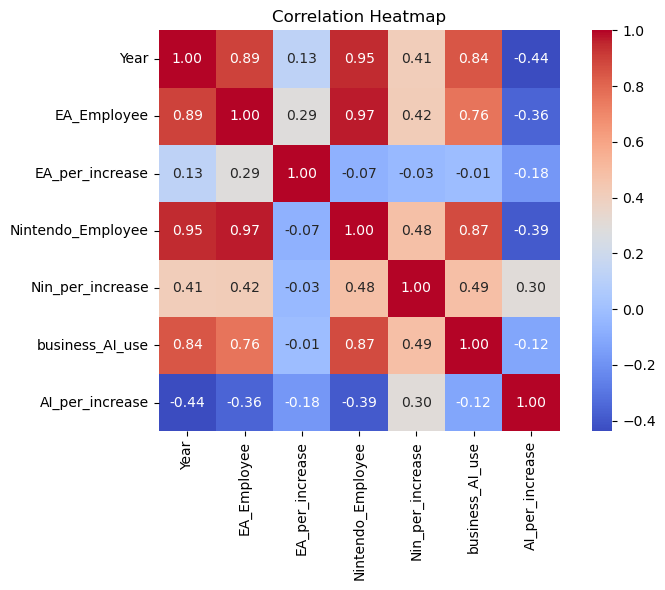

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

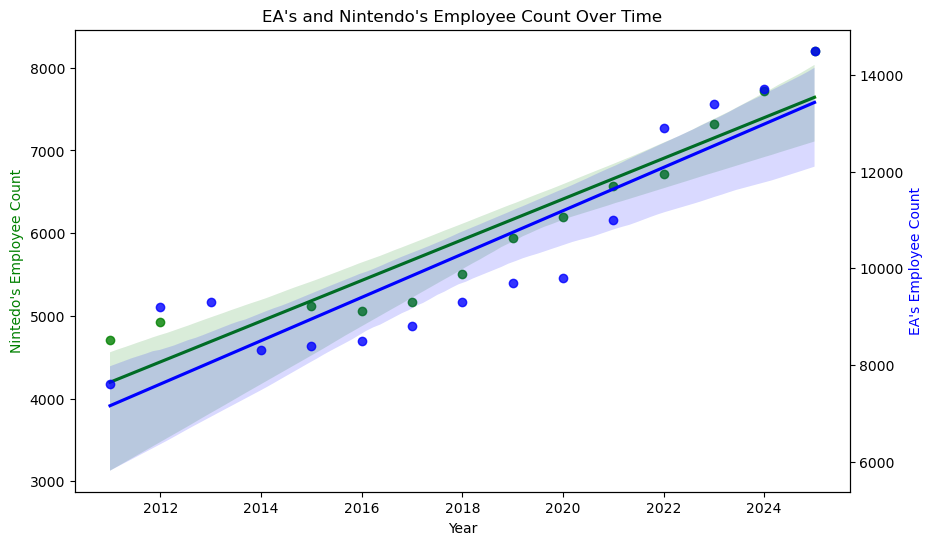

In [9]:
df = df.sort_values("Year")

fig, ax1 = plt.subplots(figsize=(10,6))

# First Y-axis (AI Usage)
sns.regplot(x="Year", y="Nintendo_Employee", data=df,
            scatter_kws={"color": "green"},
            line_kws={"color": "green"},
            ax=ax1)

ax1.set_ylabel("Nintedo's Employee Count", color="green")
ax1.set_xlabel("Year")

# Second Y-axis (Employment)
ax2 = ax1.twinx()

sns.regplot(x="Year", y="EA_Employee", data=df,
            scatter_kws={"color": "blue"},
            line_kws={"color": "blue"},
            ax=ax2)

ax2.set_ylabel("EA's Employee Count", color="blue")

plt.title("EA's and Nintendo's Employee Count Over Time")
plt.show()


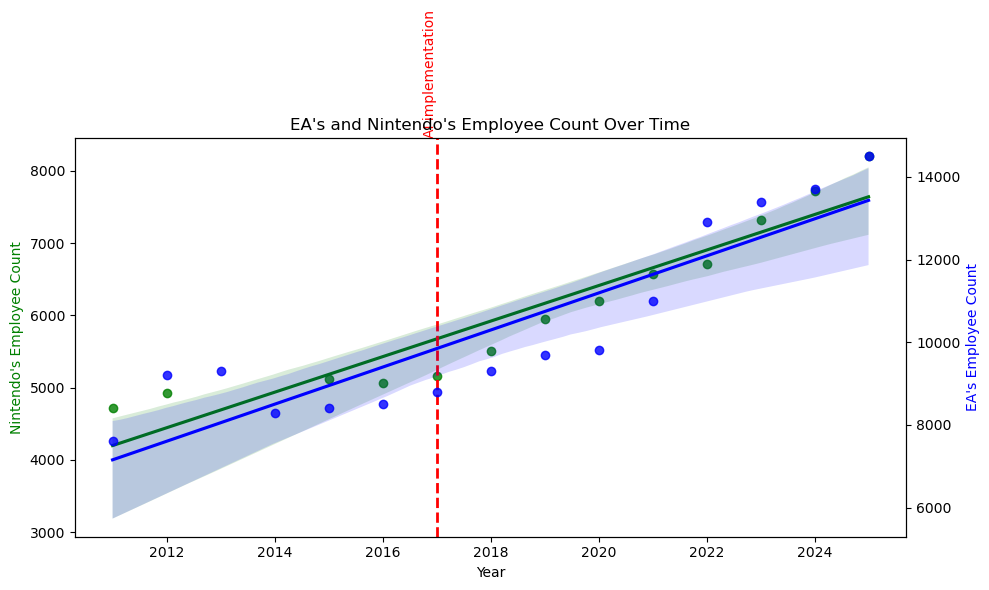

In [10]:
df = df.sort_values("Year")

fig, ax1 = plt.subplots(figsize=(10,6))

# First Y-axis (Nintendo Employment)
sns.regplot(x="Year", y="Nintendo_Employee", data=df,
            scatter_kws={"color": "green"},
            line_kws={"color": "green"},
            ax=ax1)

ax1.set_ylabel("Nintendo's Employee Count", color="green")
ax1.set_xlabel("Year")

# Add vertical red line at 2017
ax1.axvline(x=2017, color='red', linestyle='--', linewidth=2)

# Add vertical label
ymax = ax1.get_ylim()[1]  # get top of y-axis
ax1.text(2017, ymax,
         "AI implementation",
         rotation=90,
         color='red',
         verticalalignment='bottom',
         horizontalalignment='right')

# Second Y-axis (EA Employment)
ax2 = ax1.twinx()

sns.regplot(x="Year", y="EA_Employee", data=df,
            scatter_kws={"color": "blue"},
            line_kws={"color": "blue"},
            ax=ax2)

ax2.set_ylabel("EA's Employee Count", color="blue")

plt.title("EA's and Nintendo's Employee Count Over Time")
plt.tight_layout()
plt.show()

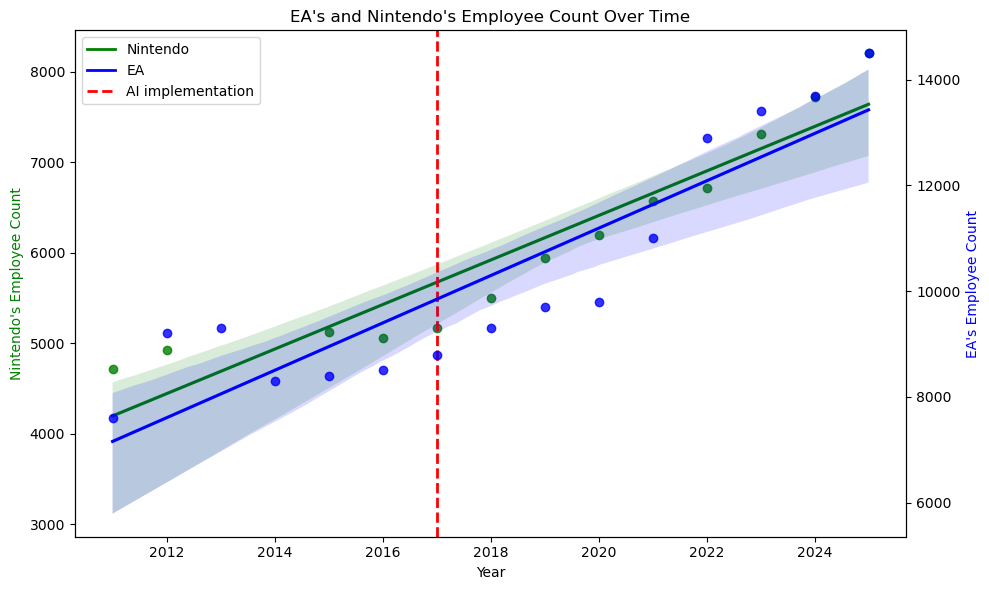

In [14]:
df = df.sort_values("Year")

fig, ax1 = plt.subplots(figsize=(10,6))

nintendo_plot = sns.regplot(
    x="Year", y="Nintendo_Employee", data=df,
    scatter_kws={"color": "green"},
    line_kws={"color": "green"},
    ax=ax1
)

ax1.set_ylabel("Nintendo's Employee Count", color="green")
ax1.set_xlabel("Year")

# Add vertical red line at 2017
ai_line = ax1.axvline(
    x=2017,
    color='red',
    linestyle='--',
    linewidth=2,
)

ax2 = ax1.twinx()

ea_plot = sns.regplot(
    x="Year", y="EA_Employee", data=df,
    scatter_kws={"color": "blue"},
    line_kws={"color": "blue"},
    ax=ax2
)

ax2.set_ylabel("EA's Employee Count", color="blue")

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color='green', lw=2, label="Nintendo"),
    Line2D([0], [0], color='blue', lw=2, label="EA"),
    Line2D([0], [0], color='red', lw=2, linestyle='--', label="AI implementation")
]

ax1.legend(handles=legend_elements, loc="best")

plt.title("EA's and Nintendo's Employee Count Over Time")
plt.tight_layout()
plt.show()